<a href="https://colab.research.google.com/github/ChinmayeeJuturu/DL_assignment_148/blob/main/dl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [3]:
# Load dataset using torchvision
def load_data(batch_size=32):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [4]:
# Define the Feedforward Neural Network class
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, activation_fn=nn.ReLU):
        super(FeedforwardNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(activation_fn())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [5]:
# Training function
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cpu'):
    model.to(device)
    best_val_acc = 0
    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.view(images.size(0), -1).to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        val_acc = evaluate_model(model, val_loader, device)
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        best_val_acc = max(best_val_acc, val_acc)
    return best_val_acc

In [6]:
# Evaluation function
def evaluate_model(model, data_loader, device='cpu'):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.view(images.size(0), -1).to(device), labels.to(device)
            outputs = model(images)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [7]:
 # Experimentation function
def run_experiments():
    input_size = 28 * 28
    output_size = 10
    batch_sizes = [16, 32, 64]
    hidden_layers_list = [[32, 32, 32], [64, 64, 64], [128, 128, 128]]
    optimizers_list = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
    activations = [nn.ReLU, nn.Sigmoid]

    best_config = None
    best_accuracy = 0

    train_loader, val_loader, test_loader = load_data(batch_size=32)

    for hidden_layers in hidden_layers_list:
        for batch_size in batch_sizes:
            for optimizer_name in optimizers_list:
                for activation_fn in activations:
                    model = FeedforwardNN(input_size, hidden_layers, output_size, activation_fn)
                    criterion = nn.CrossEntropyLoss()

                    if optimizer_name == 'sgd':
                        optimizer = optim.SGD(model.parameters(), lr=0.001)
                    elif optimizer_name == 'momentum':
                        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
                    elif optimizer_name == 'nesterov':
                        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)
                    elif optimizer_name == 'rmsprop':
                        optimizer = optim.RMSprop(model.parameters(), lr=0.001)
                    elif optimizer_name == 'adam':
                        optimizer = optim.Adam(model.parameters(), lr=0.001)
                    elif optimizer_name == 'nadam':
                        optimizer = optim.NAdam(model.parameters(), lr=0.001)

                    val_acc = train_model(model, train_loader, val_loader, optimizer, criterion, epochs=5)
                    print(f"Hidden Layers: {hidden_layers}, Batch Size: {batch_size}, Optimizer: {optimizer_name}, Activation: {activation_fn.__name__}, Val Acc: {val_acc:.4f}")

                    if val_acc > best_accuracy:
                        best_accuracy = val_acc
                        best_config = (hidden_layers, batch_size, optimizer_name, activation_fn.__name__)

    print("Best Configuration:", best_config)
    return best_config

# Run experiments
best_config = run_experiments()


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 157MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 37.3MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 98.8MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.27MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 3845.5725, Train Acc: 0.1847, Val Acc: 0.3487
Epoch 2, Loss: 3657.4564, Train Acc: 0.3311, Val Acc: 0.3453
Epoch 3, Loss: 3009.2300, Train Acc: 0.4344, Val Acc: 0.5702
Epoch 4, Loss: 1965.6008, Train Acc: 0.6494, Val Acc: 0.7243
Epoch 5, Loss: 1403.4952, Train Acc: 0.7476, Val Acc: 0.7822
Hidden Layers: [32, 32, 32], Batch Size: 16, Optimizer: sgd, Activation: ReLU, Val Acc: 0.7822
Epoch 1, Loss: 3920.3375, Train Acc: 0.0995, Val Acc: 0.0992
Epoch 2, Loss: 3886.1488, Train Acc: 0.1062, Val Acc: 0.1158
Epoch 3, Loss: 3884.5980, Train Acc: 0.1120, Val Acc: 0.1158
Epoch 4, Loss: 3884.4796, Train Acc: 0.1120, Val Acc: 0.1158
Epoch 5, Loss: 3884.4127, Train Acc: 0.1120, Val Acc: 0.1158
Hidden Layers: [32, 32, 32], Batch Size: 16, Optimizer: sgd, Activation: Sigmoid, Val Acc: 0.1158
Epoch 1, Loss: 1946.8211, Train Acc: 0.6208, Val Acc: 0.8740
Epoch 2, Loss: 642.3676, Train Acc: 0.8875, Val Acc: 0.9030
E

In [20]:
from sklearn.metrics import confusion_matrix

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.shape[0], -1)  # Flatten input
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    conf_matrix = confusion_matrix(all_labels, all_preds)  # Generate confusion matrix
    return conf_matrix  # Must be a 2D array


In [21]:
conf_matrix = evaluate_model(best_model, test_loader)

# Check if the confusion matrix is valid
print("Confusion Matrix Shape:", conf_matrix.shape)
print("Confusion Matrix:", conf_matrix)


Confusion Matrix Shape: (10, 10)
Confusion Matrix: [[  0 233   0   0 129   0   0   0   0 618]
 [  0  58   0   0 104   0   0   0   0 973]
 [  0 325   1   0 178   0   0   0   0 528]
 [  0 603   0   0 209   0   0   1   0 197]
 [  0 420   0   0 124   0   0   0   0 438]
 [  0 259   0   0 218   0   0   1   0 414]
 [  0 369   0   0  86   0   0   2   0 501]
 [  0 641   0   0   9   0   0   9   0 369]
 [  0 290   0   0 308   0   0   0   0 376]
 [  0 556   0   0  64   0   0  22   0 367]]


Confusion Matrix (Numerical Representation):
[[  0 233   0   0 129   0   0   0   0 618]
 [  0  58   0   0 104   0   0   0   0 973]
 [  0 325   1   0 178   0   0   0   0 528]
 [  0 603   0   0 209   0   0   1   0 197]
 [  0 420   0   0 124   0   0   0   0 438]
 [  0 259   0   0 218   0   0   1   0 414]
 [  0 369   0   0  86   0   0   2   0 501]
 [  0 641   0   0   9   0   0   9   0 369]
 [  0 290   0   0 308   0   0   0   0 376]
 [  0 556   0   0  64   0   0  22   0 367]]


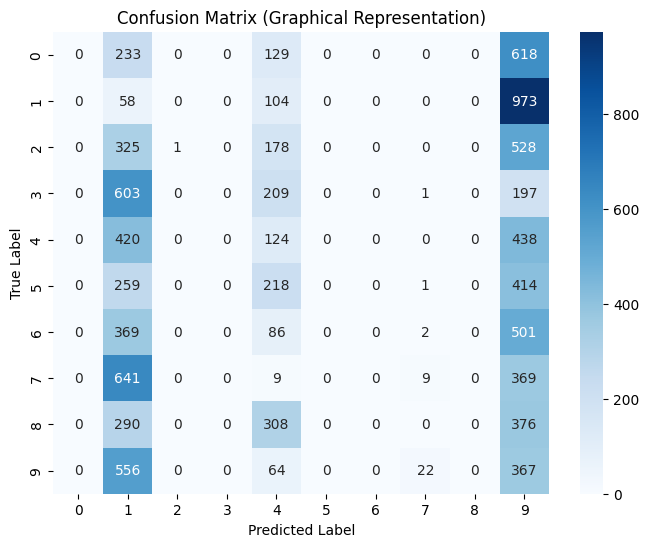

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print confusion matrix
print("Confusion Matrix (Numerical Representation):")
print(conf_matrix)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix (Graphical Representation)")
    plt.show()

# Define class names for MNIST (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)


In [23]:
import torch.nn.functional as F
import torch

def compare_losses(model, test_loader):
    model.eval()  # Set model to evaluation mode
    ce_loss_total = 0
    mse_loss_total = 0
    num_samples = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.shape[0], -1)  # Flatten input
            outputs = model(images)

            # Convert labels to one-hot encoding for MSE loss
            labels_one_hot = F.one_hot(labels, num_classes=outputs.shape[1]).float()

            # Compute Cross-Entropy Loss (CE)
            ce_loss = F.cross_entropy(outputs, labels)
            ce_loss_total += ce_loss.item() * images.shape[0]  # Sum over batch

            # Compute Mean Squared Error Loss (MSE)
            mse_loss = F.mse_loss(F.softmax(outputs, dim=1), labels_one_hot)
            mse_loss_total += mse_loss.item() * images.shape[0]  # Sum over batch

            num_samples += images.shape[0]

    # Compute average loss over all samples
    ce_loss_avg = ce_loss_total / num_samples
    mse_loss_avg = mse_loss_total / num_samples

    return ce_loss_avg, mse_loss_avg


In [24]:
ce_loss, mse_loss = compare_losses(best_model, test_loader)
print(f"Cross Entropy Loss: {ce_loss:.4f}, Mean Squared Error Loss: {mse_loss:.4f}")


Cross Entropy Loss: 2.3001, Mean Squared Error Loss: 0.0900
